In [2]:
import pandas as pd
import numpy as np
import os
from utils_dist_corr import *

In [3]:
path_data = '/Users/alouette/Documents/Perceptual_Space_ALS/'

## Characterize geometry of perceptual space
Euclidian distance based on 2 first dimension of PCA space 

Take coordinates computed using v = all mod (all 3 modalities at the same time in the same PCA)

In [12]:
stims = ['music','face','odor']
nb_stim = 18

for stim in stims:
    files_pca = [f for f in os.listdir(path_data + 'df_pca/') if f.endswith('ALL_PCA.csv')]

    all_dist = np.zeros((nb_pairs(nb_stim),len(files_pca)))
    all_sub = []
    for i, f in enumerate(files_pca):
        df = pd.read_csv(path_data+'df_pca/'+ f, index_col=0)
        df_sel = df.loc[df.stimulus_type == stim]
        pairs = define_pairs(df_sel.stimulus_name)
        dist = compute_all_dist(df_sel, pairs, name_col='stimulus_name',
                           x_col='coord.Dim.1', y_col='coord.Dim.2')
        all_dist[:,i] += dist
        all_sub.append(df.subject.values[0])

    data_df = np.concatenate((np.array(pairs),all_dist),axis=1)
    df_all = pd.DataFrame(data=data_df, columns=['p0','p1']+all_sub)
    df_all.to_csv(path_data+'Python/all_dist_stim='+stim+'_v=allmod.csv')

#### Compute distances BETWEEN modality spaces (ex: all distances between odors and the rest of stimuli)

In [46]:
files_pca = [f for f in os.listdir(path_data + 'df_pca/') if f.endswith('ALL_PCA.csv')]

all_dist = np.zeros((972, len(files_pca)))
all_sub = []
for i, f in enumerate(files_pca):
    df = pd.read_csv(path_data+'df_pca/'+ f, index_col=0)
    df['stim_name2'] = ['O'+name if name[0] not in ('M','V') else name for name in df.stimulus_name]
    pairs = define_pairs_diff(df.stim_name2)
    dist = compute_all_dist(df, pairs, name_col='stim_name2',
                       x_col='coord.Dim.1', y_col='coord.Dim.2')
    all_dist[:,i] += dist
    all_sub.append(df.subject.values[0])

data_df = np.concatenate((np.array(pairs),all_dist),axis=1)
df_all = pd.DataFrame(data=data_df, columns=['p0','p1']+all_sub)
df_all.to_csv(path_data+'Python/all_dist_BTW_stim_v=allmod.csv')

evals_su=S09-CBS_stim=ALL_ALL_PCA.csv
evals_su=S11-SBC_stim=ALL_ALL_PCA.csv
evals_su=S28-CSB_stim=ALL_ALL_PCA.csv
evals_su=S15-SBC_stim=ALL_ALL_PCA.csv
evals_su=S20-SCB_stim=ALL_ALL_PCA.csv
evals_su=S01-BSC_stim=ALL_ALL_PCA.csv
evals_su=S19-BCS_stim=ALL_ALL_PCA.csv
evals_su=S17-CSB_stim=ALL_ALL_PCA.csv
evals_su=S13-SCB_stim=ALL_ALL_PCA.csv
evals_su=S24-SCB_stim=ALL_ALL_PCA.csv
evals_su=S18b-SBC_stim=ALL_ALL_PCA.csv
evals_su=S07-BCS_stim=ALL_ALL_PCA.csv
evals_su=S20b-SCB_stim=ALL_ALL_PCA.csv
evals_su=S08-CSB_stim=ALL_ALL_PCA.csv
evals_su=S16-BSC_stim=ALL_ALL_PCA.csv
evals_su=S21-CBS_stim=ALL_ALL_PCA.csv
evals_su=S04-SCB_stim=ALL_ALL_PCA.csv
evals_su=S12-CBS_stim=ALL_ALL_PCA.csv
evals_su=S23-SBC_stim=ALL_ALL_PCA.csv
evals_su=S10-BCS_stim=ALL_ALL_PCA.csv
evals_su=S08-BSC_stim=ALL_ALL_PCA.csv
evals_su=S33-CBS_stim=ALL_ALL_PCA.csv
evals_su=S12-SCB_stim=ALL_ALL_PCA.csv
evals_su=S18-SBC_stim=ALL_ALL_PCA.csv
evals_su=S16-CSB_stim=ALL_ALL_PCA.csv
evals_su=S27-CBS_stim=ALL_ALL_PCA.csv
evals_su=S

## Compare perceptual space
Compare the consistency (R) btw space across subject for each sensory modality

### Compute perceptual spaces' consistency across subjects - WITHIN MODALITY

In [49]:
path_df = path_data+'Python/all_dist_stim={}_v=allmod.csv'
stims = ['music','face','odor']

space_r = []
for stim in stims:
    df = pd.read_csv(path_df.format(stim), index_col=0)
    subj = [c for c in df.columns if c not in ['p0','p1']]
    pairs_su = define_pairs(subj)
    corr = compute_all_R(df, pairs_su, meth='spearman')
    space_r.append(corr) 
space_r = np.transpose(np.vstack(space_r))

df_r_var = pd.DataFrame(space_r, columns=stims)
print(df_r_var.describe())
df_r_var.to_csv(path_data+'Python/btw_subj_consistency_allstims_v=allmod.csv',index=False)

         music      face      odor
0    -0.053809  0.042002  0.017827
1    -0.060263  0.004484 -0.095241
2    -0.040808  0.102922  0.084570
3    -0.064033  0.150604  0.043382
4    -0.000798  0.013993  0.156688
...        ...       ...       ...
1123  0.016337 -0.050063 -0.041102
1124 -0.052585  0.011029 -0.075830
1125  0.038821 -0.112521  0.034416
1126 -0.009889  0.314896  0.183276
1127  0.125655 -0.162611  0.078304

[1128 rows x 3 columns]


ZeroDivisionError: division by zero

#### Compute perceptual spaces' consistency across subjects - BETWEEN MODALITY

In [69]:
path_df = path_data+'Python/all_dist_BTW_stim_v=allmod.csv'
stims_to_key = {'music':'M',
                'face': 'V',
                'odor':'O'}

df = pd.read_csv(path_df.format(stim), index_col=0)
subj = [c for c in df.columns if c not in ['p0','p1']]
pairs_su = define_pairs(subj)

space_r = []
for stim in stims_to_key:
    key = stims_to_key[stim]
    df_sel = df.loc[df['p0'].str.contains(key) | df['p1'].str.contains(key)]
    
    corr = compute_all_R(df_sel, pairs_su, meth='spearman')
    space_r.append(corr) 
space_r = np.transpose(np.vstack(space_r))
df_r_var = pd.DataFrame(space_r, columns=stims)
print(df_r_var.describe())
df_r_var.to_csv(path_data+'Python/btw_subj_consistency_BTW_stim_v=allmod.csv',index=False)

             music         face         odor
count  1128.000000  1128.000000  1128.000000
mean      0.044397     0.016004     0.032402
std       0.090931     0.093876     0.094836
min      -0.237452    -0.429801    -0.317152
25%      -0.015909    -0.046089    -0.030986
50%       0.037914     0.015806     0.028640
75%       0.102192     0.074298     0.089030
max       0.418970     0.473881     0.477549


### Compare consistencies across modality (+ paired links)

In [117]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pingouin as pg 

df_r_var = pd.read_csv(path_data+'Python/btw_subj_consistency_BTW_stim_v=allmod.csv')

# Plot results 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,4))
df_r_var.boxplot(column=stims, ax=axes)

# Compute 1-way repeated measures ANOVA
df_r_stats = df_r_var.melt()
df_r_stats.columns = ['stims','btw_su_corr']
df_r_stats['su_pairs'] = np.concatenate([np.arange(0,df_r_var.shape[0],1)]*3)
anova = pg.rm_anova(data=df_r_stats, dv='btw_su_corr', within='stims',
                    subject='su_pairs')
pg.print_table(anova, floatfmt='.3f')

# Bonf-corrected post hocs with Hedges'g effect size
posthoc = pg.pairwise_tests(data=df_r_stats, dv='btw_su_corr', within='stims',
                            subject='su_pairs', padjust='bonf')
pg.print_table(posthoc, floatfmt='.3f')

# Pairwise correlations between sensory modality
pair_r = pg.pairwise_corr(df_r_var, method='pearson')
print(pair_r)

      music      face      odor
0  0.011386  0.051637  0.076367
1 -0.034762 -0.059339 -0.031133
2  0.129040  0.182768  0.188094
3 -0.002251 -0.034732 -0.018874
4  0.042358  0.036182 -0.025365
     variable     value
0       music  0.011386
1       music -0.034762
2       music  0.129040
3       music -0.002251
4       music  0.042358
...       ...       ...
3379     odor  0.029520
3380     odor  0.035225
3381     odor  0.022413
3382     odor  0.121348
3383     odor -0.023563

[3384 rows x 2 columns]


ZeroDivisionError: division by zero

### Compare perceptual spaces' size and dispersion v=bymod

In [71]:
stims = ['music','face','odor']
cols_to_sel = ['%var_cum','pol_surf','circ_surf','avg_d']

files_pca = [f for f in os.listdir(path_data + 'df_pca/') if f.endswith('_PCA_sum.csv')]
    
all_pca = np.zeros((len(files_pca),4))
infos = np.array([])
for i,f in enumerate(files_pca):
    splits = [sp.split('_') for sp in f.split('=')]
    s_splits = np.array((splits[1][0],splits[2][0]))
    infos = np.vstack((infos,s_splits)) if np.size(infos) else np.array(s_splits)
    
    df = pd.read_csv(path_data+'df_pca/'+f, index_col=0)
    df.columns = ['cos2','%var','%var_cum','pol_surf','circ_surf','x0','y0','avg_d']
    sel = df[cols_to_sel].loc[['comp 2']].values[0]
    all_pca[i,:] += sel

data_df = np.concatenate((infos,all_pca), axis=1)
df_all = pd.DataFrame(data=data_df, columns=['subject','stim']+cols_to_sel)
print(df_all)
df_all.to_csv(path_data+'Python/all_spaces_geometry.csv',index=False)

ValueError: Length mismatch: Expected axis has 12 elements, new values have 8 elements

### Compare perceptual spaces' size and dispersion v=allmod
Average distance and circle surface NOT included

In [110]:
files_pca = [f for f in os.listdir(path_data + 'df_pca/') if f.endswith('ALL_PCA_sum.csv')]
    
all_pca = np.zeros((len(files_pca),3))
infos = np.array([])
for i,f in enumerate(files_pca):
    splits = [sp.split('_') for sp in f.split('=')]
    s_splits = np.array((splits[1][0]))
    infos = np.vstack((infos,s_splits)) if np.size(infos) else np.array(s_splits)
    
    df = pd.read_csv(path_data+'df_pca/'+f, index_col=0)
    cols_to_sel = [c for c in df.columns if 'surf' in c]
    sel = df[cols_to_sel].loc[['comp 2']].values[0]
    all_pca[i,:] += sel

data_df = np.concatenate((infos,all_pca), axis=1)
df_all = pd.DataFrame(data=data_df, columns=['subject']+cols_to_sel)
df_all.to_csv(path_data+'Python/all_spaces_geometry_v=allmod.csv',index=False)

### Statistics and plots - spaces geometry 

>> effect of surf ALL mod 
             variable      value  subjects
0     surf poly  odor  12.332140  S20b-SCB
1     surf poly  odor   6.269392   S23-SCB
2     surf poly  odor   7.467699   S07-BCS
3     surf poly  odor   8.313055   S31-CSB
4     surf poly  odor  14.599307   S12-SCB
..                ...        ...       ...
139  surf poly  music  10.547275   S05-BCS
140  surf poly  music  13.743209   S13-SCB
141  surf poly  music   6.367777   S01-BSC
142  surf poly  music   5.305469   S13-BCS
143  surf poly  music   6.571744   S14-CBS

[144 rows x 3 columns]

ANOVA SUMMARY

Source      ddof1    ddof2       F    p-unc    ng2    eps
--------  -------  -------  ------  -------  -----  -----
variable        2       94  18.423    0.000  0.195  0.997


POST HOC TESTS

Contrast    A                 B                 Paired    Parametric         T     dof  alternative      p-unc    p-corr  p-adjust         BF10    hedges
----------  ----------------  ----------------  --------  ------------ 

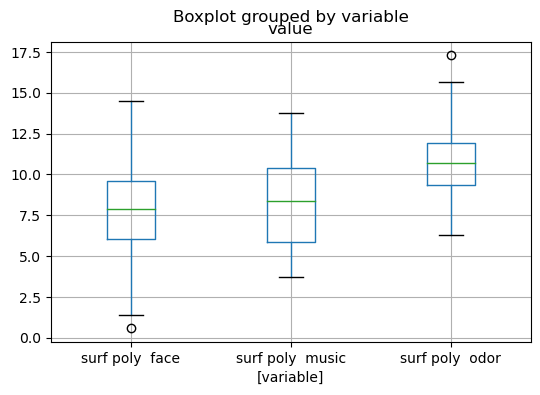

In [166]:
import pingouin as pg 
v = 'allmod'

df_geo0 = pd.read_csv(path_data+'Python/all_spaces_geometry_v=allmod.csv')
if v == 'allmod':
    df_geo = df_geo0.iloc[:,1:].melt()
    df_geo['subjects'] = list(df_geo0['subject'].values)*3

    # Plot results 
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
    print('>> effect of surf ALL mod ')
    df_geo[['value','variable']].boxplot(ax=axes, by='variable')
    print(df_geo)
    anova = pg.rm_anova(data=df_geo, dv='value', within='variable',
                    subject='subjects')
    pg.print_table(anova, floatfmt='.3f')

    if anova.iloc[0,4] < 0.05:
        # Bonf-corrected post hocs with Hedges'g effect size
        posthoc = pg.pairwise_tests(data=df_geo, dv='value', within='variable',
                            subject='subjects', padjust='bonf')
        pg.print_table(posthoc, floatfmt='.3f')
    

else:
    # Plot results 
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,4))
    for i,c in enumerate(df_geo.columns[2:]):
        print('>> effect of modality on ',c)
        df_geo[[c,'stim']].boxplot(ax=axes[i], by='stim')
        anova = pg.rm_anova(data=df_geo, dv=c, within='stim',
                        subject='subject')
        pg.print_table(anova, floatfmt='.3f')

        if anova.iloc[0,4] < 0.05:
            # Bonf-corrected post hocs with Hedges'g effect size
            posthoc = pg.pairwise_tests(data=df_geo, dv=c, within='stim',
                                subject='subject', padjust='bonf')
            pg.print_table(posthoc, floatfmt='.3f')
    